In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('D://Projects//Zeotap Assessment//Customers.csv')
transactions = pd.read_csv('D://Projects//Zeotap Assessment//Transactions.csv')

merged_data = transactions.merge(customers, on='CustomerID')

# Feature Engineering: Aggregate transaction data for each customer
customer_features = merged_data.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    unique_products=('ProductID', 'nunique'),
    avg_transaction_value=('TransactionID', 'count') 
).reset_index()

customer_features = customer_features.merge(customers, on='CustomerID')

customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Droped non-numeric columns like CustomerName as I received a Value error
customer_features = customer_features.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'], errors='ignore')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

# Determining the optimal number of clusters using the Elbow Method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

customer_features['Cluster'] = kmeans.labels_

C:\Users\mithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mithu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

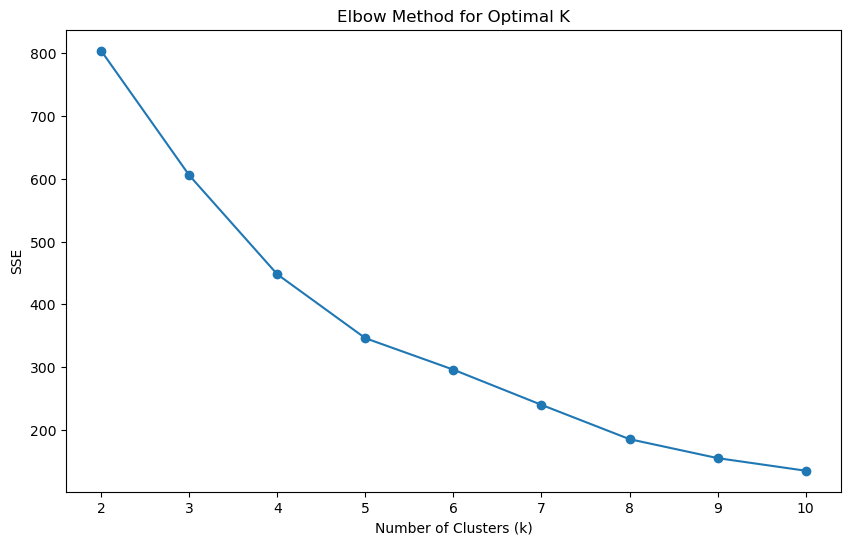

In [13]:
# Visual representation of Elbow method for optimal K
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

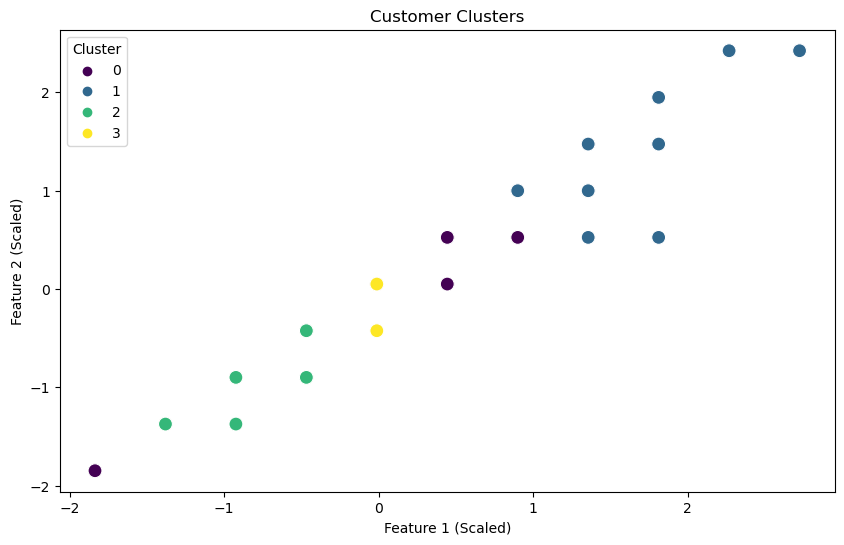

In [14]:
# Visual representaion of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], 
    hue=customer_features['Cluster'], palette='viridis', s=100
)
plt.title('Customer Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Obtaining Davies Bouldin Index value
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"DB Index: {db_index}")

DB Index: 0.9653469116276433
